In [10]:
# Reassigning numeric values to frequency categories for on-campus and off-campus usage of Gcooter
import pandas as pd
import matplotlib.pyplot as plt

# Load the survey data
file_path = 'survey_data.csv'
survey_data = pd.read_csv(file_path)
gcooter_users = survey_data[survey_data["학기 중, 지쿠터(전동킥보드, 전동자전거) 서비스를 한 번이라도 이용하십니까?"] == "네, 지쿠터 서비스를 이용합니다."]
#survey_data["교외에서 지쿠터 서비스를 이용 시, 학부 기숙사를 기준으로 보통 어느 정도의 거리, 경로를 이용하십니까?"].unique()

In [11]:
# On-campus route distances in meters
on_campus_distances = {
    "학부 기숙사 ↔ 대학 A, B, C동": 315,
    "학부 기숙사 ↔ 중앙 도서관, 다산 빌딩": 467,
    "학부 기숙사 ↔ 전컴동 및 금호관": 680,
    "학부 기숙사 ↔ 신소재공학동, 지환공학동, 생명과학동, 행정동": 736,
    "학부 기숙사 ↔ 제1 학생회관 및 카페, AI 대학원, 기계공학동": 830,
    "학부 기숙사 ↔ 오룡관, 축구장, 또는 그 이상": 1200
}

# Off-campus route distances in meters
off_campus_distances = {
    "학부 기숙사 ↔ 쌍암 공원, 또는 그 이하": 1100,
    "학부 기숙사 ↔ 투썸플레이스, 삼복당(이층면옥), 첨단공원국밥, 미케 PC방, 식당 해이리, 달빛에 구운 고등어": 1100,
    "학부 기숙사 ↔ 다이소(쌍암점, 광주첨단점)": 1100,
    "학부 기숙사 ↔ LC타워": 2300,
    "학부 기숙사 ↔ 시너지, 아크레타, 보이저": 2000,
    "학부 기숙사 ↔ 광주 비아 정류소, 또는 그 이상": 2600
}
# Extracting the frequency distribution for on-campus and off-campus from the dataset
on_campus_route_selections = gcooter_users.iloc[:, 6].value_counts()  # Column G
off_campus_route_selections = gcooter_users.iloc[:, 7].value_counts() # Column H

# Function to calculate weighted average distance
def calculate_weighted_average_distance(route_selections, route_distances):

    total_distance = 0
    total_selections = 0
    for route, frequency in route_selections.items():
        total_distance += route_distances[route] * frequency
        total_selections += frequency
    return total_distance / total_selections if total_selections > 0 else 0

# Calculating the weighted average distance for on-campus and off-campus
average_on_campus_distance = calculate_weighted_average_distance(on_campus_route_selections, on_campus_distances)
average_off_campus_distance = calculate_weighted_average_distance(off_campus_route_selections, off_campus_distances)

print(average_on_campus_distance)
print(average_off_campus_distance)
print(on_campus_route_selections)

892.0625
1456.25
교내에서 지쿠터 서비스를 이용 시, 학부 기숙사를 기준으로 보통 어느 정도의 거리, 경로를 이용하십니까?\n(해당 경로가 없다면, 가장 비슷한 거리의 경로를 선택해주시기 바랍니다.)
학부 기숙사 ↔ 오룡관, 축구장, 또는 그 이상              6
학부 기숙사 ↔ 신소재공학동, 지환공학동, 생명과학동, 행정동      6
학부 기숙사 ↔ 전컴동 및 금호관                      2
학부 기숙사 ↔ 제1 학생회관 및 카페, AI 대학원, 기계공학동    1
학부 기숙사 ↔ 중앙 도서관, 다산 빌딩                  1
Name: count, dtype: int64


In [14]:
# Filtering out responses from students who use Gcooter services
gcooter_users = survey_data[survey_data["학기 중, 지쿠터(전동킥보드, 전동자전거) 서비스를 한 번이라도 이용하십니까?"] == "네, 지쿠터 서비스를 이용합니다."]

# frequency_mapping_gcooter = {
#     "주 1~2회": 1.5,  # Midpoint for 1-2 times a week
#     "주 3~5회": 4,    # Midpoint for 3-5 times a week
#     "주 9회 이상": 9,  # Using 9 as a representative number for more than 9 times a week
#     "주 0회 (교외 이동 시에만 지쿠터를 사용할 경우)": 0,  # Zero for exclusive off-campus usage
#     "주 0회 (교내 이동 시에만 지쿠터를 사용할 경우)": 0   # Zero for exclusive on-campus usage
# }

frequency_mapping_gcooter = {
    "주 1~2회": 1,  # Midpoint for 1-2 times a week
    "주 3~5회": 3,    # Midpoint for 3-5 times a week
    "주 9회 이상": 9,  # Using 9 as a representative number for more than 9 times a week
    "주 0회 (교외 이동 시에만 지쿠터를 사용할 경우)": 0,  # Zero for exclusive off-campus usage
    "주 0회 (교내 이동 시에만 지쿠터를 사용할 경우)": 0   # Zero for exclusive on-campus usage
}

# Mapping frequency responses to numeric values for on-campus and off-campus usage of Gcooter
on_campus_usage_mapped_gcooter = gcooter_users["학기 중, 지쿠터 서비스를 이용해 교내를 이동하는 횟수가 몇 번 입니까?"].map(frequency_mapping_gcooter)
off_campus_usage_mapped_gcooter = gcooter_users["학기 중, 지쿠터 서비스를 이용해 교외로 이동하는 횟수가 몇 번 입니까?"].map(frequency_mapping_gcooter)

# Calculating average number of trips per week for on-campus and off-campus usage of Gcooter
average_on_campus_trips_per_week = on_campus_usage_mapped_gcooter.mean()
average_off_campus_trips_per_week = off_campus_usage_mapped_gcooter.mean()

# On-campus and off-campus average distances for Gcooter trips
average_on_campus_distance = calculate_weighted_average_distance(on_campus_route_selections, on_campus_distances)    # Average on-campus distance per trip in meters
average_off_campus_distance_gcooter = calculate_weighted_average_distance(off_campus_route_selections, off_campus_distances) # Average off-campus distance per trip in meters

# Weekly average distances for Gcooter usage
weekly_average_distance_on_campus_gcooter = average_on_campus_trips_per_week * average_on_campus_distance
weekly_average_distance_off_campus_gcooter = average_off_campus_trips_per_week * average_off_campus_distance

# Total weekly average distance for Gcooter usage
total_weekly_average_distance_gcooter = weekly_average_distance_on_campus_gcooter + weekly_average_distance_off_campus_gcooter

In [15]:
print(total_weekly_average_distance_gcooter)
print(average_on_campus_trips_per_week)
print(average_off_campus_trips_per_week)

3043.57421875
2.1875
0.75


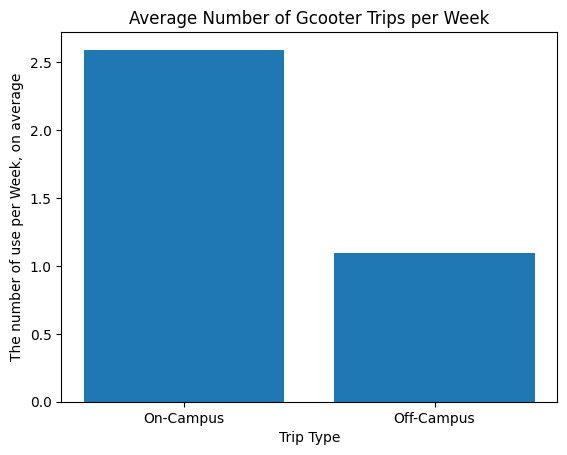

In [9]:
plt.bar(['On-Campus', 'Off-Campus'], [average_on_campus_trips_per_week, average_off_campus_trips_per_week])
plt.xlabel('Trip Type')
plt.ylabel('The number of use per Week, on average')
plt.title('Average Number of Gcooter Trips per Week')
plt.show()